# 1. Enhancer Data Analysis: ATAC-seq, TF Motif Discovery

workflow:
1. downloaded ENCODE enhancer file v
2. downloaded ENCODE atac files for heart, liver, brain, lung v
3. filter out low DNase
4. show atac count for enhancers -> bwtool v
5. calculate mean of atac count per enhancer v
6. make bam with added atac count
7. explore how many enhancers there are with atac count - reasonable amount
8. make fasta files from bam - use filtered bam with enhancers 
9. TF annotation
10. make matrix tissues / TFs , atac count

In [145]:
tissues <- c("brain", "heart", "liver", "lung")
file_paths_enhancer <- c(
  "data/ENCODE/brain/brain_astrocyte_cerebellum.bed",
  "data/ENCODE/heart/heart_left_ventricule_female_46y.bed",
  "data/ENCODE/liver/ENCFF606YDZ.7group.bed",
  "data/ENCODE/lung/ENCFF883DDK.7group.bed"
)
file_paths_bigwig <- c(
    "data/ENCODE/brain/ENCFF847DVN.bigWig",
    "data/ENCODE/heart/ENCFF016KCE.bigWig",
    "data/ENCODE/lung/ENCFF538SJJ.bigWig",
    "data/ENCODE/liver/ENCFF646EEM.bigWig"
    )
file_path_fasta_sequence_file <- "data/hg38.fa"
file_path_motif_file <- "../transfac2021_vertebrate_recommended.meme"


## 0. Clean enhancer files --> filter out "Low-DNAse"

In [154]:
read_and_clean(file_paths_enhancer, tissues) 

<environment: R_GlobalEnv>

## 1. combine atac & enhancers (bwtool)

In [148]:
for (i in 1:length(tissues)) { 
    extract_bwtool_data(tissues[i], file_paths_enhancer_cleaned[i], 
                        file_paths_bigwig[i], file_paths_enhancer_atac[i])
                              }

## 2. calculate mean of atac counts per enhancer

In [155]:
files_enhancer_atac_mean <- calculate_mean_and_update(file_paths_enhancer_atac)

## 3. show histograms

Dataframe: 1 Tissue: brain_2 


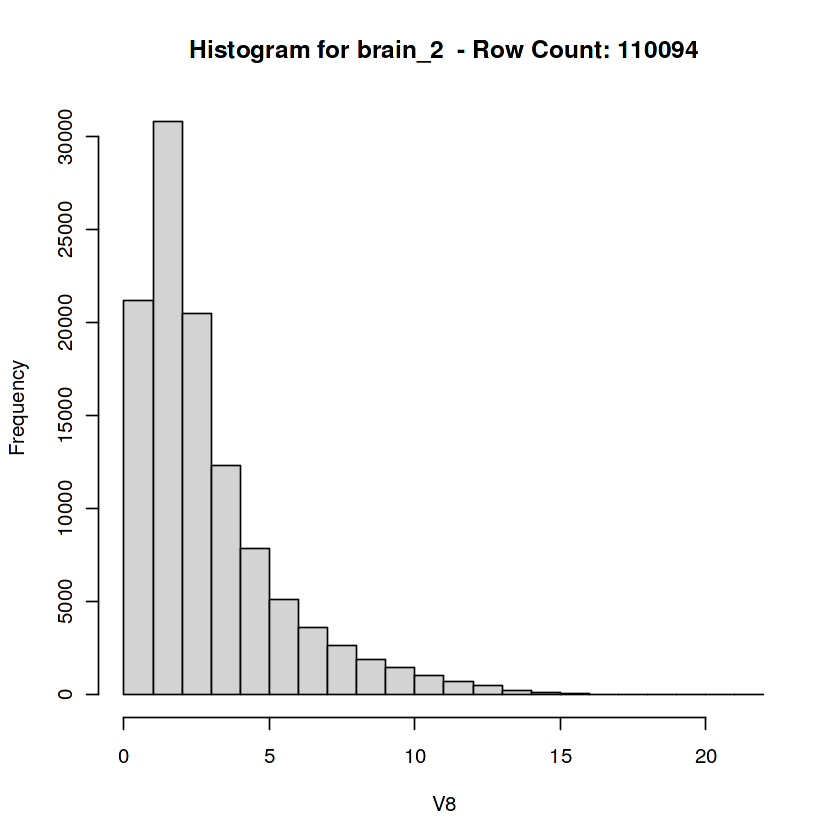

Dataframe: 2 Tissue: heart_2 


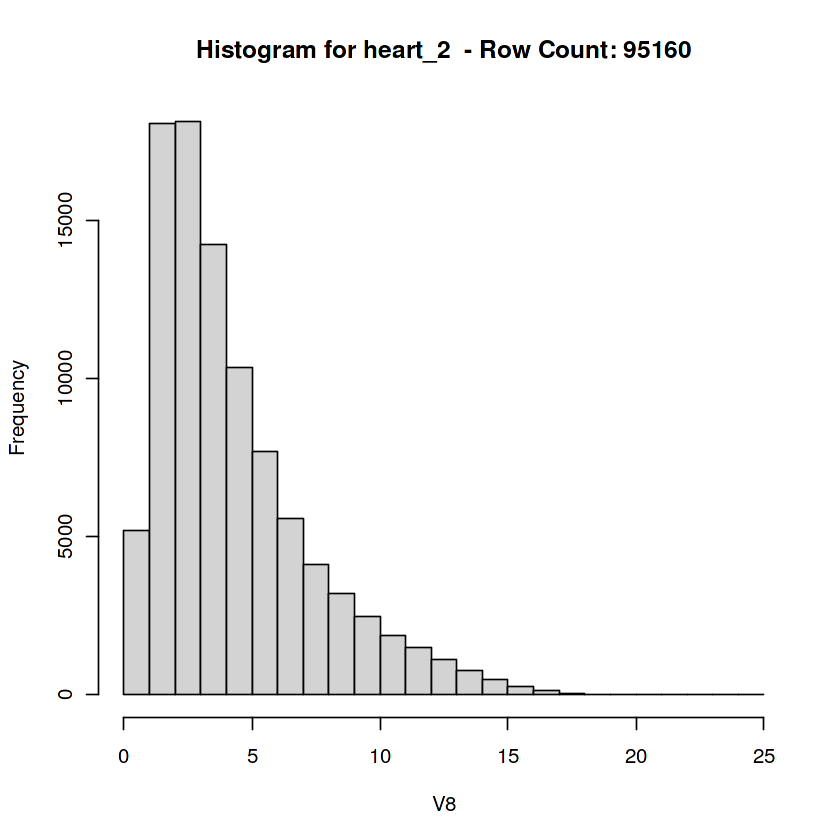

Dataframe: 3 Tissue: liver_2 


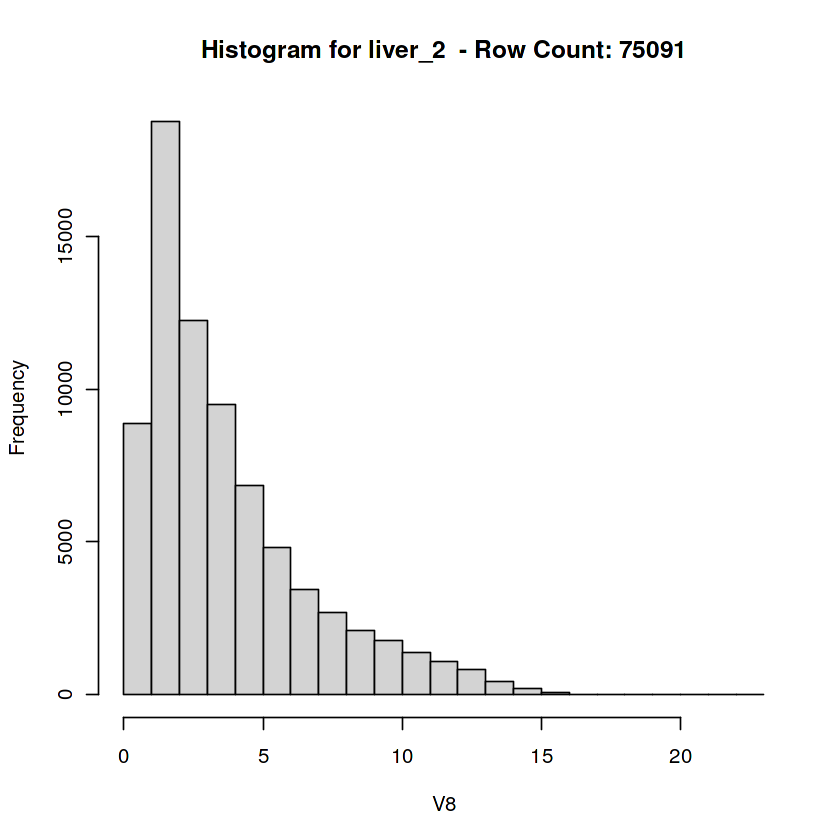

Dataframe: 4 Tissue: lung_2 


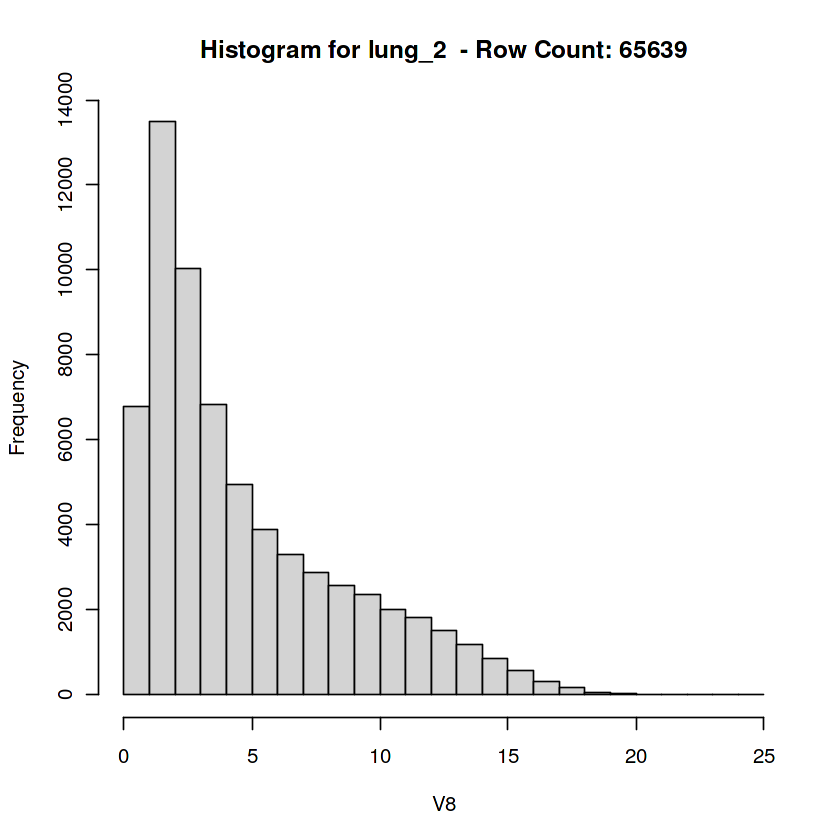

In [156]:
plot_histograms(files_enhancer_atac_mean, tissues, bins = 30)

Dataframe: 1 Tissue: brain_2 


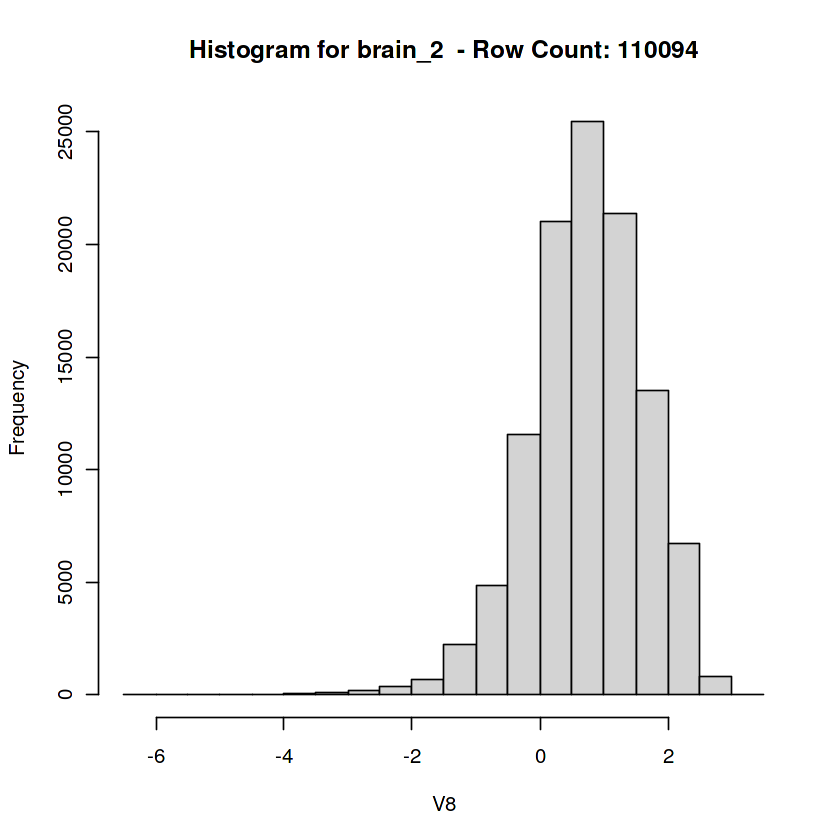

Dataframe: 2 Tissue: heart_2 


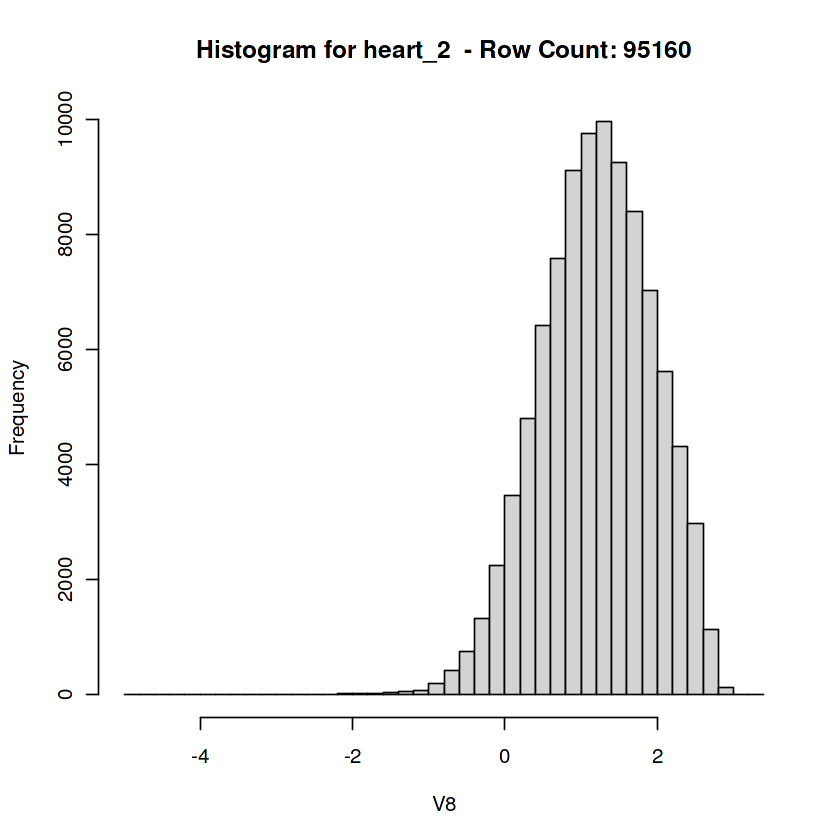

Dataframe: 3 Tissue: liver_2 


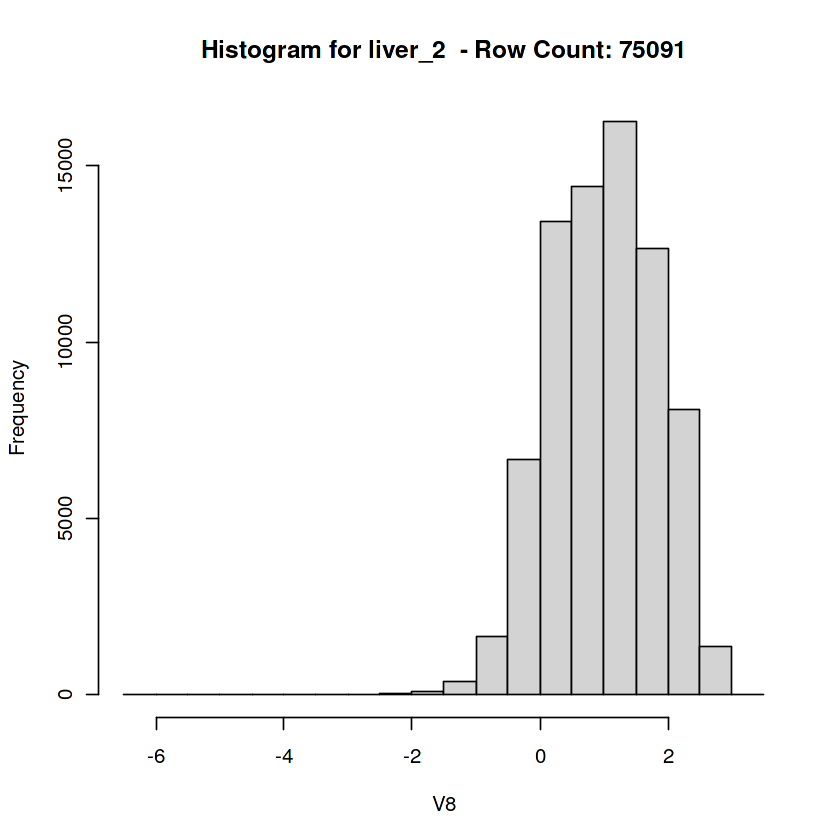

Dataframe: 4 Tissue: lung_2 


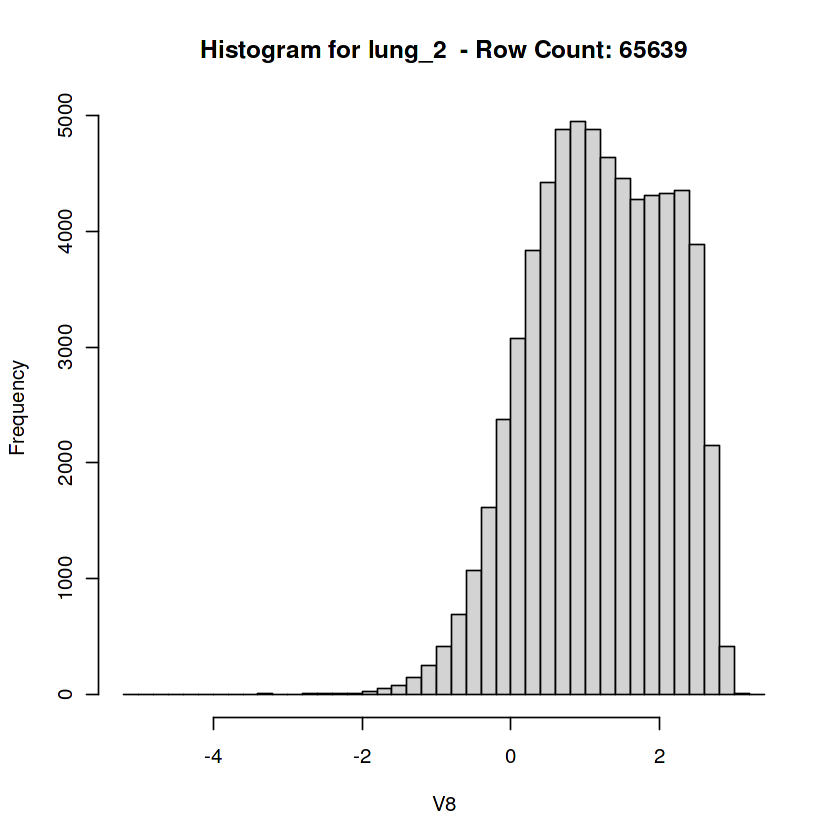

In [158]:
plot_histograms_log(files_enhancer_atac_mean, tissues, bins = 30)

## 4. transform values to avoid artifacts

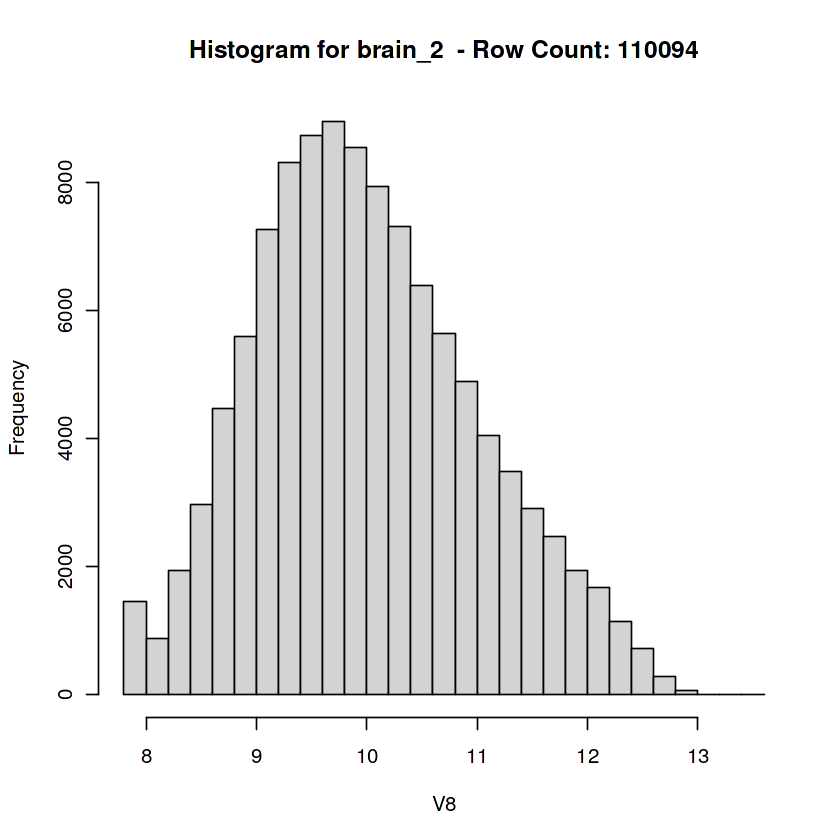

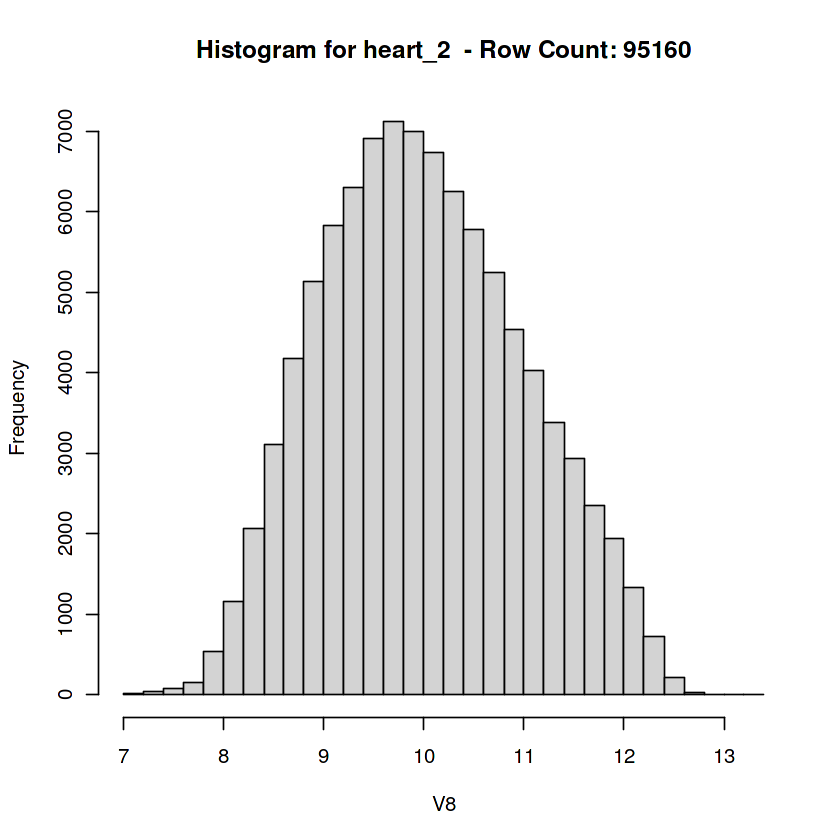

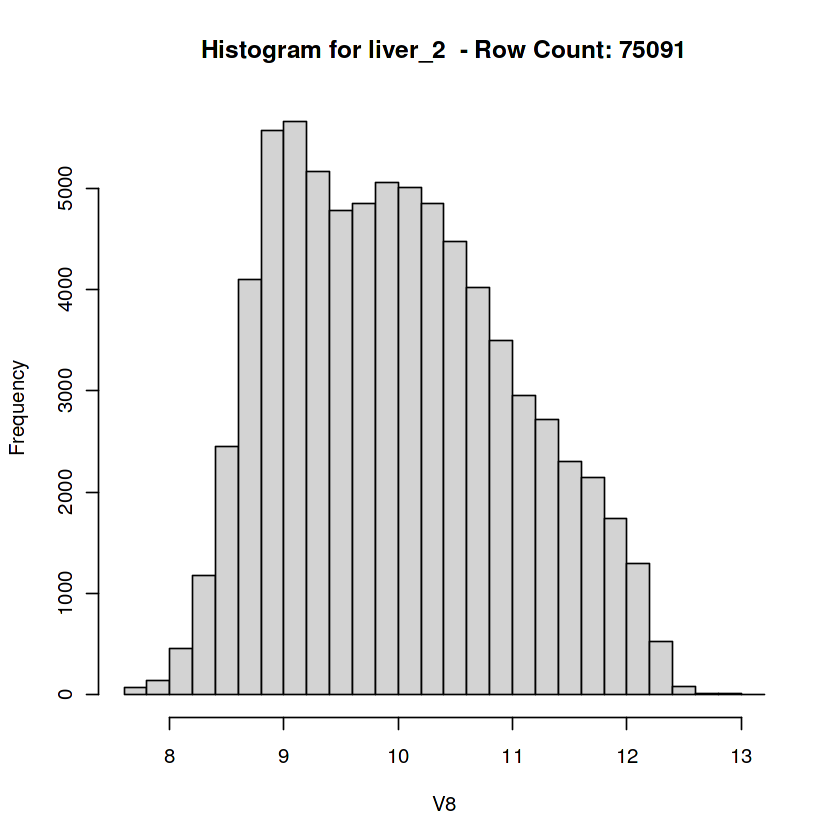

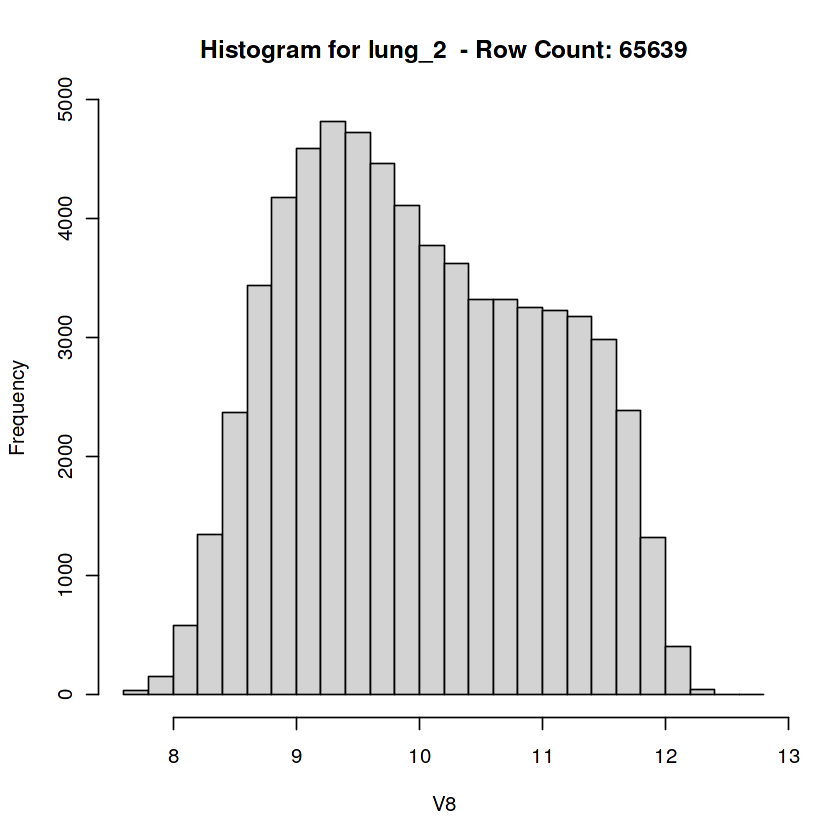

In [160]:
shift_value <- 10
transformed_dfs <- transform_and_save_dataframes(files_enhancer_atac_mean, 
                                                 tissues, shift_value)

## 5. get fasta sequences

In [162]:
for (i in 1:length(tissues)) { 
    fasta_function(tissues[i], file_path_fasta_sequence_file, 
                   file_paths_bed[i],  file_paths_fasta[i])
    }

## 6. fimo TF annotation

In [165]:
for (i in 1:length(tissues)) { 
    fimo_tf_annotation(tissues[i], file_paths_fasta[i], 
                       file_path_motif_file, file_paths_fimo[i])
    }

## 7. Collapse overlapping matches to one

In [14]:
# file paths for previously existing fimo files
#file_paths_fimo_old <- list()
#for (tissue in tissues) {
 # file_path <- file.path("data/fimo/whole_genome", tissue, "fimo.tsv")
  #file_paths_fimo_old[[tissue]] <- file_path
#}

In [172]:
#output_directory <- "data/fimo/whole_genome/"  
collapse_fimo_function(tissues, file_paths_fimo)

brain_2 nrow before collapsing: 26293145


`summarise()` has grouped output by 'motif_id', 'motif_alt_id', 'sequence_name',
'strand', 'score', 'p.value', 'q.value'. You can override using the `.groups`
argument.


brain_2 nrow after collapsing: 25905556, reduction by 1.015%
heart_2 nrow before collapsing: 24595043


`summarise()` has grouped output by 'motif_id', 'motif_alt_id', 'sequence_name',
'strand', 'score', 'p.value', 'q.value'. You can override using the `.groups`
argument.


heart_2 nrow after collapsing: 24225140, reduction by 1.015%
liver_2 nrow before collapsing: 20624353


`summarise()` has grouped output by 'motif_id', 'motif_alt_id', 'sequence_name',
'strand', 'score', 'p.value', 'q.value'. You can override using the `.groups`
argument.


liver_2 nrow after collapsing: 20295982, reduction by 1.016%
lung_2 nrow before collapsing: 19843109


`summarise()` has grouped output by 'motif_id', 'motif_alt_id', 'sequence_name',
'strand', 'score', 'p.value', 'q.value'. You can override using the `.groups`
argument.


lung_2 nrow after collapsing: 19509184, reduction by 1.017%
